<a href="https://colab.research.google.com/github/HuyKhoi-code/intro-to-semantic-segment/blob/main/FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khoivohuy","key":"02df61ffe25a9966bf3dcafeb89f10a6"}'}

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 65 Nov 15 09:33 kaggle.json


In [4]:
# dowload dataset from kaggle
!kaggle datasets download -d xiaose/cityscapes

100% 7.92G/7.92G [02:01<00:00, 37.0MB/s]
100% 7.92G/7.92G [02:01<00:00, 69.8MB/s]


In [5]:
!unzip cityscapes.zip

Streaming output truncated to the last 5000 lines.
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072155_gtFine_polygons.json  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_color.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_instanceIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_instanceTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_labelIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_labelTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_polygons.json  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_color.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_instanceIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_instanceTrainIds.png  
  inflating: Cit

## GET THE DATA AND REVIEW

test on img from aachen folder

In [6]:
# get the label data
label_path = glob.glob('/content/Cityspaces/gtFine/train/aachen/aachen_000'+'*'+'_000019_gtFine_labelIds.png')
label_path.sort()
print (label_path)

['/content/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000001_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000003_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000004_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000005_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000006_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000007_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000008_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000009_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000010_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000011_000019_gtFine_labelI

In [7]:
# original img data
img_path = glob.glob('/content/Cityspaces/images/train/aachen/aachen_000'+'*'+'_000019_leftImg8bit.png')
img_path.sort()
print (img_path)

['/content/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000001_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000002_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000003_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000004_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000005_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000006_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000007_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000008_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000009_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000010_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000011_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aache

In [8]:
label_path = np.array(label_path)
img_path = np.array (img_path)
label = label_path[2]
seg = cv2.imread (label)
seg = cv2.resize (seg,(224,224))
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))



minimum seg = 1, maximum seg = 33, Total number of segmentation classes = 33


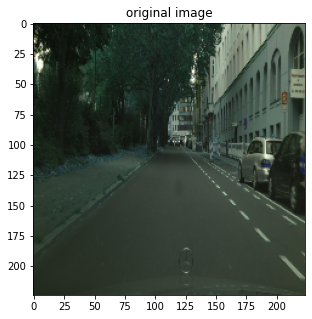

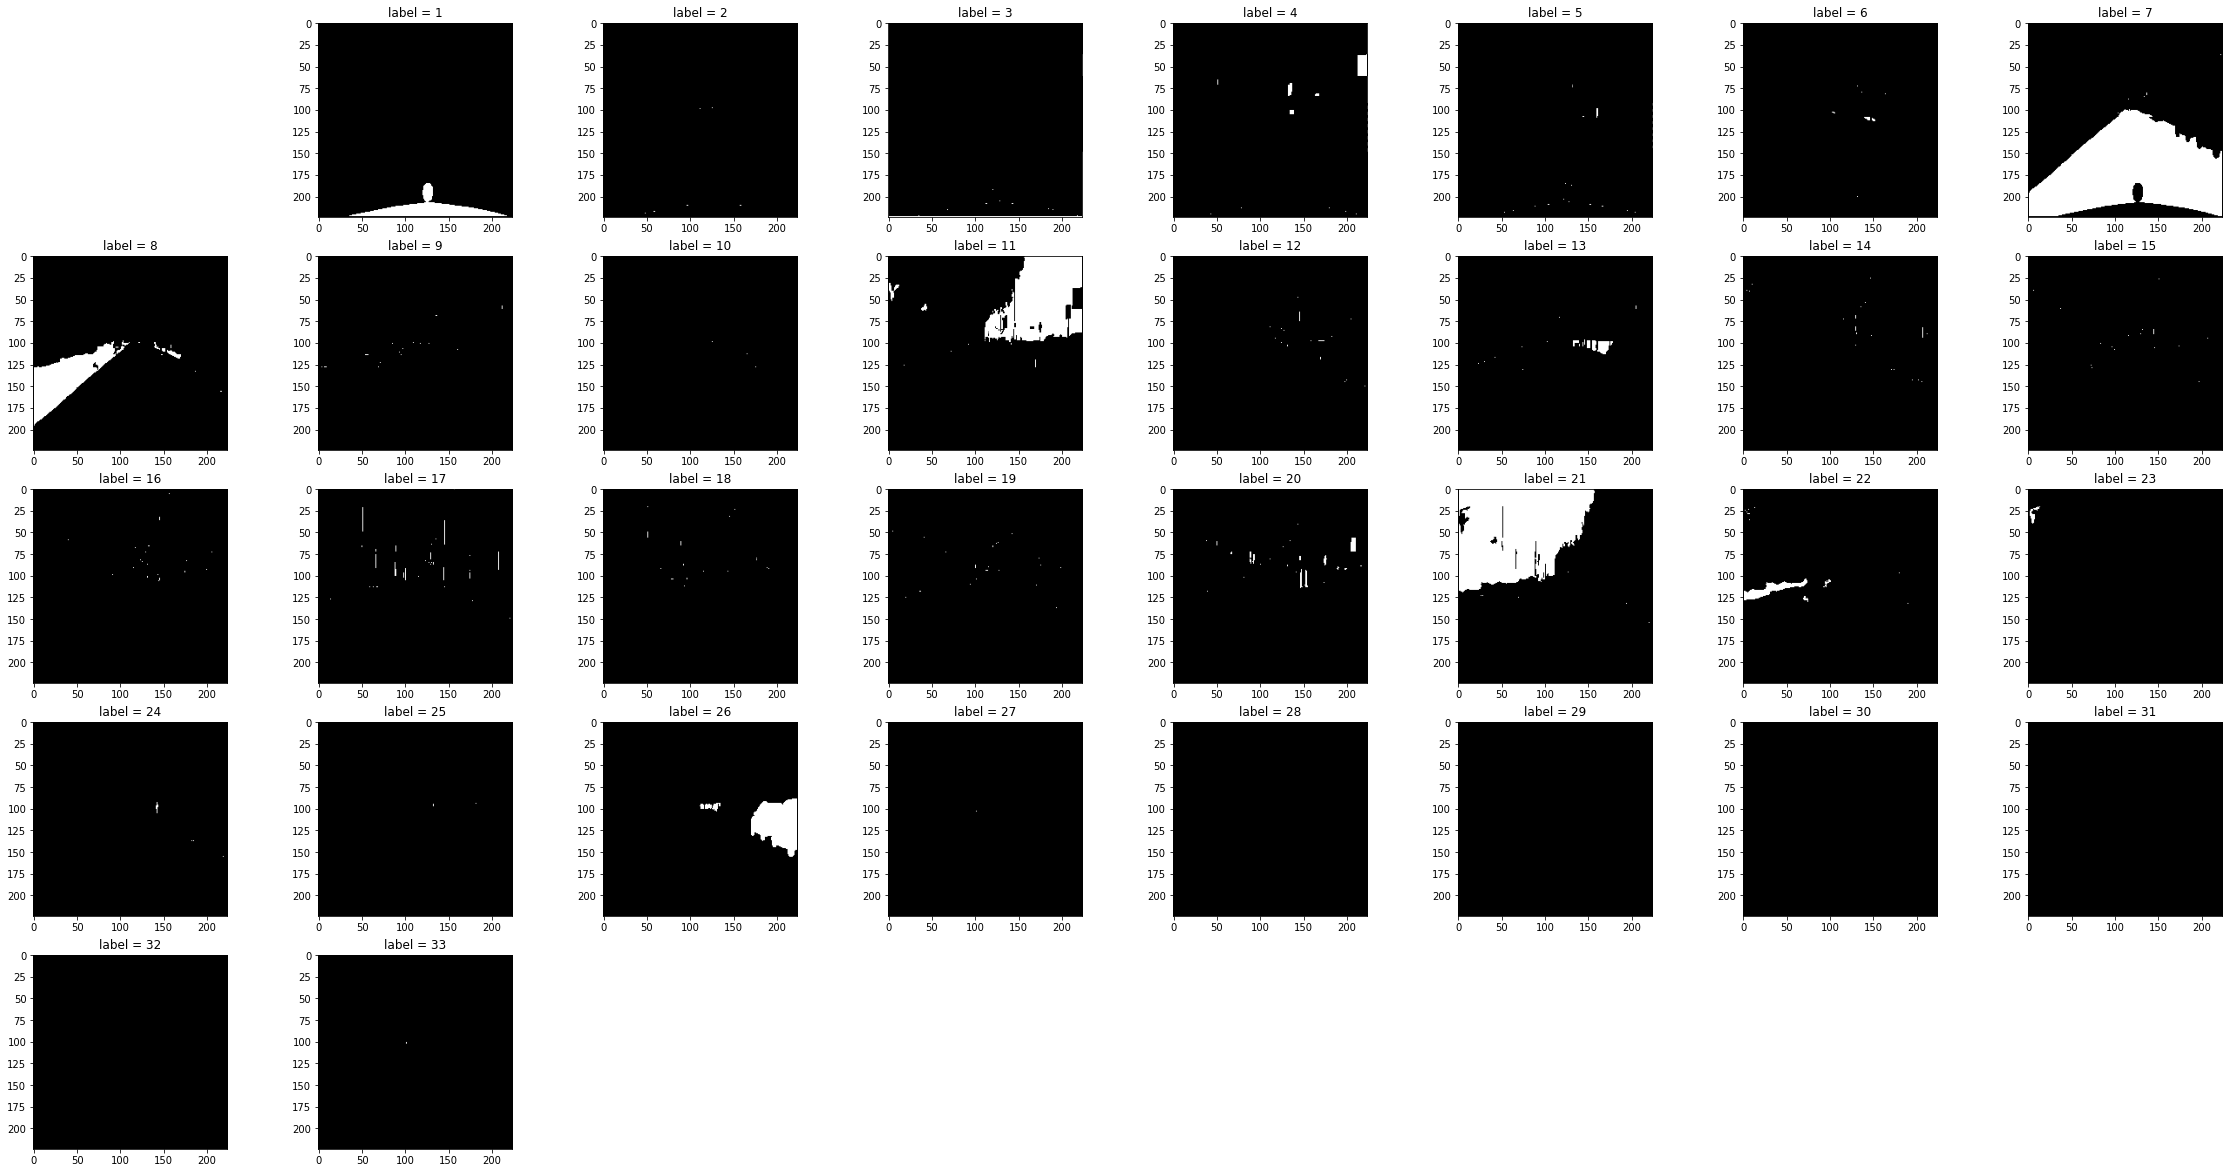

In [ ]:
# review img and all the labels of the dataset
img = img_path[2]
img = cv2.imread(img)
img = cv2.resize(img, (224,224))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_title("original image")
plt.show()

fig = plt.figure(figsize=(40,25))
for k in range(mi,ma+1):
    ax = fig.add_subplot(6, n_classes/4, k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format(k))


plt.show()

## PREPROCESSING IMG 

In [9]:
# for vgg basenet, resize all the input img to 224,224 
input_height , input_width = 224 , 224
output_height , output_width = 224 , 224

def getImageArr( path , width , height ):
        img = cv2.imread(path)
        img = np.float32(cv2.resize(img, ( width , height ))) / 255
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c).astype(int)
    return seg_labels

X = []
Y = []
for im , seg in zip (img_path, label_path) :
    X.append( getImageArr (im , input_width , input_height )  )
    Y.append( getSegmentationArr (seg , n_classes , output_width , output_height )  )

X, Y = np.array(X) , np.array(Y)
print(X.shape,Y.shape)

(174, 224, 224, 3) (174, 224, 224, 33)


## INITIALIZE THE MODEL  

In [2]:
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras import optimizers

review the vgg pretrained model 

In [ ]:
# Load pretrain model
pretrain_net = VGG16(include_top=False, weights="imagenet")
i = 0
# print all layers from the model 
for layer in pretrain_net.layers:
  print('{} layer {}: {}'.format(i, layer.output.name, layer.output.shape))
  i+=1
print('pretrain_net output: ', pretrain_net.output)


58892288/58889256 [==============================] - 0s 0us/step
0 layer input_1:0: (None, None, None, 3)
1 layer block1_conv1/Relu:0: (None, None, None, 64)
2 layer block1_conv2/Relu:0: (None, None, None, 64)
3 layer block1_pool/MaxPool:0: (None, None, None, 64)
4 layer block2_conv1/Relu:0: (None, None, None, 128)
5 layer block2_conv2/Relu:0: (None, None, None, 128)
6 layer block2_pool/MaxPool:0: (None, None, None, 128)
7 layer block3_conv1/Relu:0: (None, None, None, 256)
8 layer block3_conv2/Relu:0: (None, None, None, 256)
9 layer block3_conv3/Relu:0: (None, None, None, 256)
10 layer block3_pool/MaxPool:0: (None, None, None, 256)
11 layer block4_conv1/Relu:0: (None, None, None, 512)
12 layer block4_conv2/Relu:0: (None, None, None, 512)
13 layer block4_conv3/Relu:0: (None, None, None, 512)
14 layer block4_pool/MaxPool:0: (None, None, None, 512)
15 layer block5_conv1/Relu:0: (None, None, None, 512)
16 layer block5_conv2/Relu:0: (None, None, None, 512)
17 layer block5_conv3/Relu:0: (Non

3 layers for skip connect

In [ ]:
pool3 = pretrain_net.layers[10]
pool4 = pretrain_net.layers[14]
pool5 = pretrain_net.layers[18]
print (pool3.output, pool4.output, pool5.output)

Tensor("block3_pool/MaxPool:0", shape=(None, None, None, 256), dtype=float32) Tensor("block4_pool/MaxPool:0", shape=(None, None, None, 512), dtype=float32) Tensor("block5_pool/MaxPool:0", shape=(None, None, None, 512), dtype=float32)


In [11]:
!wget https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-11-15 09:41:31--  https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889256 (56M) [application/octet-stream]
Saving to: ‘vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5’

vgg16_weights_tf_di 100%[===================>]  56.16M  68.1MB/s    in 0.8s    

2020-11-15 09:41:33 (68.1 MB/s) - ‘vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [58889256/58889256]



In [12]:
VGG_Weights_path = "/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [13]:
def FCN8(nClasses, input_height=224, input_width=224):
    IMAGE_ORDERING =  "channels_last" 

    img_input = Input(shape=(input_height,input_width, 3))
    

    ## Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1', data_format=IMAGE_ORDERING )(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool', data_format=IMAGE_ORDERING )(x)
    f1 = x
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool', data_format=IMAGE_ORDERING )(x)
    f2 = x

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3', data_format=IMAGE_ORDERING )(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool', data_format=IMAGE_ORDERING )(x)
    pool3 = x

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3', data_format=IMAGE_ORDERING )(x)
    pool4 = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool', data_format=IMAGE_ORDERING )(x)## (None, 14, 14, 512) 

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1', data_format=IMAGE_ORDERING )(pool4)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2', data_format=IMAGE_ORDERING )(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3', data_format=IMAGE_ORDERING )(x)
    pool5 = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool', data_format=IMAGE_ORDERING )(x)## (None, 7, 7, 512)
    
    vgg  = Model(  img_input , pool5  )
    vgg.load_weights(VGG_Weights_path)
    
    n = 4096
    o = ( Conv2D( n , ( 7 , 7 ) , activation='relu' , padding='same', name="conv6", data_format=IMAGE_ORDERING))(pool5)
    conv7 = ( Conv2D( n , ( 1 , 1 ) , activation='relu' , padding='same', name="conv7", data_format=IMAGE_ORDERING))(o)
    
    conv7_up = Conv2DTranspose( pool4.get_shape().as_list()[-1] , kernel_size=(2,2) ,  strides=(2,2) , name= 'conv7_up', use_bias=False, data_format=IMAGE_ORDERING )(conv7)

    conv7_skip_connect = tf.keras.layers.Add()([pool4, conv7_up])

    conv8 = Conv2DTranspose( pool3.get_shape().as_list()[-1] , kernel_size=(2,2) ,  strides=(2,2) ,name = 'conv8', use_bias=False, data_format=IMAGE_ORDERING )(conv7_skip_connect)
    
    conv8_skip_connect = tf.keras.layers.Add()([pool3, conv8])

    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) ,name = 'out', use_bias=False, data_format=IMAGE_ORDERING )(conv8_skip_connect)
    o = (Activation('softmax'))(o) 
    """## 4 times upsamping for pool4 layer
    conv7_4 = Conv2DTranspose( nClasses , kernel_size=(4,4) ,  strides=(4,4) , use_bias=False, data_format=IMAGE_ORDERING )(conv7)
    ## (None, 224, 224, 10)
    ## 2 times upsampling for pool411
    pool411 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool4_11", data_format=IMAGE_ORDERING))(pool4)
    pool411_2 = (Conv2DTranspose( nClasses , kernel_size=(2,2) ,  strides=(2,2) , use_bias=False, data_format=IMAGE_ORDERING ))(pool411)
    
    pool311 = ( Conv2D( nClasses , ( 1 , 1 ) , activation='relu' , padding='same', name="pool3_11", data_format=IMAGE_ORDERING))(pool3)
        
    o = Add(name="add")([pool411_2, pool311, conv7_4 ])
    o = Conv2DTranspose( nClasses , kernel_size=(8,8) ,  strides=(8,8) , use_bias=False, data_format=IMAGE_ORDERING )(o)
    o = (Activation('softmax'))(o)"""
    
    model = Model(img_input, o)

    return model

In [14]:
model  = FCN8(nClasses=   n_classes,  
             input_height = 224, 
             input_width  = 224)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_______________________________________________________________________________________

## SPLIT TRAIN AND VALUATE DATA

In [16]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split (X, Y, test_size = 0.25)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(130, 224, 224, 3) (130, 224, 224, 33)
(44, 224, 224, 3) (44, 224, 224, 33)


## TRAIN AND OPTIMIZE

In [17]:
# use sgd for optimizing model 
sgd = optimizers.SGD(lr=0.01, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=20,epochs=60,verbose=2)

Epoch 1/60
7/7 - 372s - loss: 3.3658 - accuracy: 0.1763 - val_loss: 2.2837 - val_accuracy: 0.4422
Epoch 2/60
7/7 - 372s - loss: 2.1618 - accuracy: 0.4326 - val_loss: 1.8721 - val_accuracy: 0.4978
Epoch 3/60
7/7 - 372s - loss: 1.7682 - accuracy: 0.5186 - val_loss: 1.7116 - val_accuracy: 0.5169
Epoch 4/60
7/7 - 371s - loss: 1.7674 - accuracy: 0.5053 - val_loss: 1.7560 - val_accuracy: 0.5053
Epoch 5/60
7/7 - 374s - loss: 1.6194 - accuracy: 0.5467 - val_loss: 1.6025 - val_accuracy: 0.5439
Epoch 6/60
7/7 - 380s - loss: 1.5331 - accuracy: 0.5697 - val_loss: 1.4644 - val_accuracy: 0.5895
Epoch 7/60
7/7 - 379s - loss: 1.3999 - accuracy: 0.6129 - val_loss: 1.3781 - val_accuracy: 0.6141
Epoch 8/60
7/7 - 378s - loss: 1.6992 - accuracy: 0.5467 - val_loss: 1.8636 - val_accuracy: 0.4359
Epoch 9/60
7/7 - 378s - loss: 1.8915 - accuracy: 0.4981 - val_loss: 1.6009 - val_accuracy: 0.5519
Epoch 10/60
7/7 - 379s - loss: 1.3977 - accuracy: 0.6104 - val_loss: 1.3496 - val_accuracy: 0.6317
Epoch 11/60
7/7 - 3

save model 

In [18]:
# save model for later use 
model.save('/content/model_FCN.h5')

## SHOW THE RESULT

plot for loss function

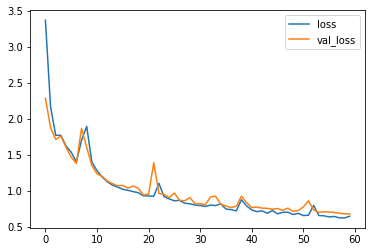

In [19]:
for key in ['loss', 'val_loss']:
    plt.plot(hist1.history[key],label=key)
plt.legend()
plt.show()

In [3]:
model = load_model ('/content/drive/My Drive/model_FCN.h5')

In [21]:
y_pred = model.predict(X_test)
# reshape the predict result and test 
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

(44, 224, 224) (44, 224, 224)


show and compare the original img, predict seg and true seg

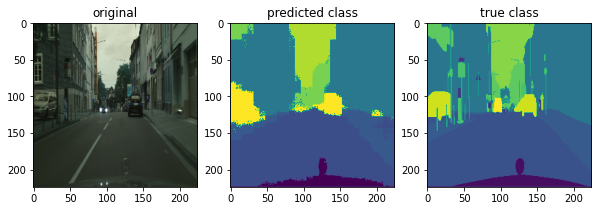

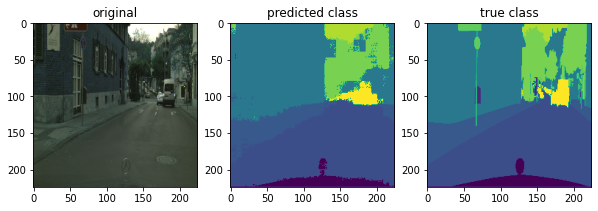

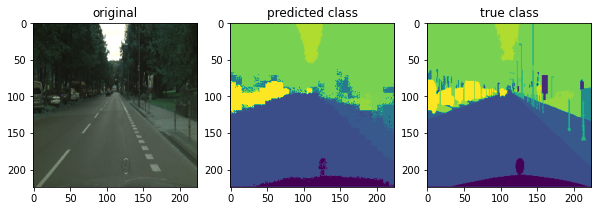

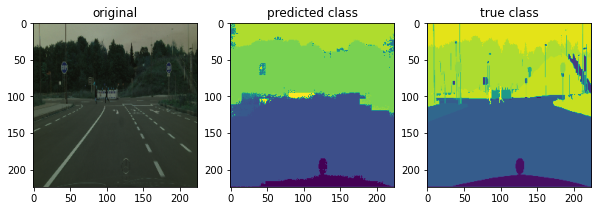

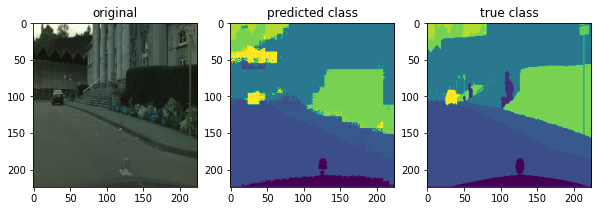

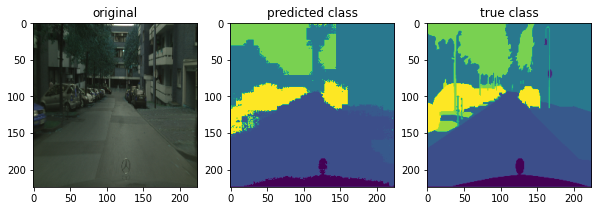

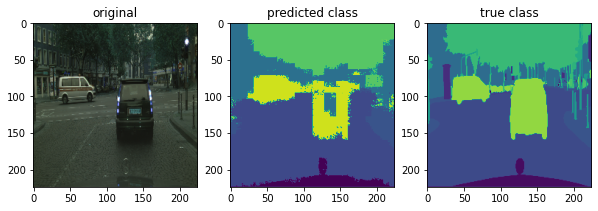

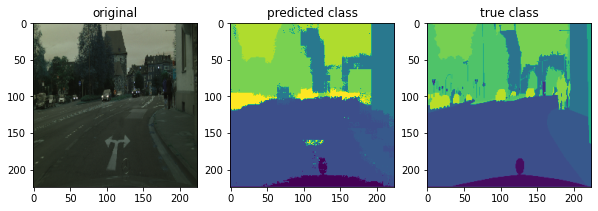

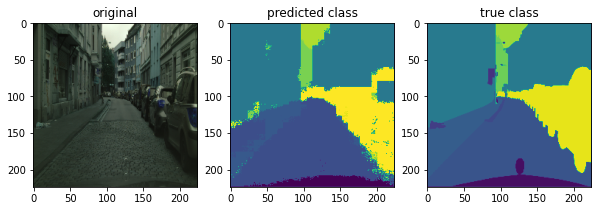

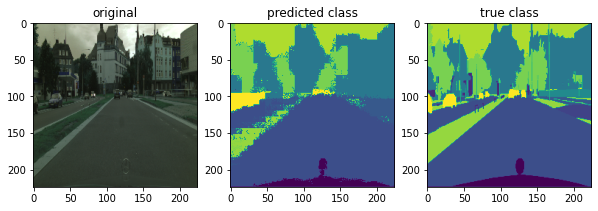

In [22]:
shape = (224,224)
n_classes= n_classes

for i in range(10):
    img_is  = X_test[i]
    seg = y_predi[i]
    true = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(seg)
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(true)
    ax.set_title("true class")
    plt.show()

mIOU score

In [23]:
def IoU(Yi,y_predi, n_classes):
    ## mean Intersection over Union
    ## Mean IoU = TP/(FN + TP + FP)

    IoUs = []
    for c in range(n_classes):
        TP = np.sum( (Yi == c)&(y_predi==c) )
        FP = np.sum( (Yi != c)&(y_predi==c) )
        FN = np.sum( (Yi == c)&(y_predi != c)) 
        IoU = TP/float(TP + FP + FN)
        print("class {:02.0f}: #TP={:6.0f}, #FP={:6.0f}, #FN={:5.0f}, IoU={:4.3f}".format(c,TP,FP,FN,IoU))
        IoUs.append(IoU)
    mIoU = np.mean(IoUs)
    print("_________________")
    print("Mean IoU: {:4.3f}".format(mIoU))
    
IoU(y_testi,y_predi, n_classes)

class 00: #TP=     0, #FP=     0, #FN= 4627, IoU=0.000
class 01: #TP= 79423, #FP= 10601, #FN= 6334, IoU=0.824
class 02: #TP=     1, #FP=     5, #FN=  313, IoU=0.003
class 03: #TP= 32604, #FP=   495, #FN= 1373, IoU=0.946
class 04: #TP=  4966, #FP=  1465, #FN=24305, IoU=0.162
class 05: #TP=    32, #FP=    86, #FN= 4788, IoU=0.007
class 06: #TP=     0, #FP=   803, #FN=37757, IoU=0.000
class 07: #TP=692848, #FP=102425, #FN=26456, IoU=0.843
class 08: #TP= 71490, #FP= 29459, #FN=59943, IoU=0.444
class 09: #TP=   240, #FP=  1061, #FN=14941, IoU=0.015
class 10: #TP=     0, #FP=     0, #FN=  717, IoU=0.000
class 11: #TP=453163, #FP=115591, #FN=51177, IoU=0.731
class 12: #TP=     0, #FP=    25, #FN= 5004, IoU=0.000
class 13: #TP=     0, #FP=     4, #FN= 7843, IoU=0.000
class 14: #TP=     0, #FP=     0, #FN= 1492, IoU=0.000
class 15: #TP=     0, #FP=     0, #FN= 1119, IoU=0.000
class 16: #TP=     0, #FP=     0, #FN= 1586, IoU=0.000
class 17: #TP=    14, #FP=   130, #FN=21916, IoU=0.001
class 18: 

## IMPLEMENT MODEL ON VALUATE DATASET

In [4]:
from google.colab.patches import cv2_imshow

In [ ]:
FCN = load_model('/content/drive/My Drive/model.h5')

In [5]:
paths = glob.glob('/content/Cityspaces/images/val/frankfurt/frankfurt_'+'*'+'_leftImg8bit.png')
print (paths)

['/content/Cityspaces/images/val/frankfurt/frankfurt_000000_005898_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_007622_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000000_006589_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_060135_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_002759_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_029086_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_028590_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000000_003357_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_011162_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_010600_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_008200_leftImg8bit.png', '/content/Cityspaces/images/val/frankfurt/frankfurt_000001_082466_leftImg8b

In [6]:
def getImageArr( path , width , height ):
        img = cv2.imread(path)
        img = np.float32(cv2.resize(img, ( width , height ))) / 255
        return img

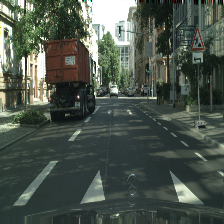

In [7]:
vals = []
for path in paths:
    val = getImageArr(path, 224, 224)
    vals.append(val)
cv2_imshow(vals[5]*255)

In [8]:
vals = np.array(vals)

In [9]:
val_img = model.predict(vals)
val_imgi = np.argmax(val_img, axis = 3)

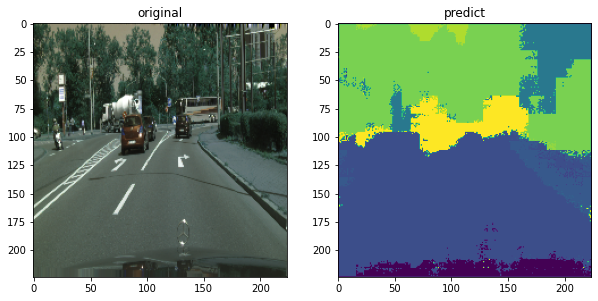

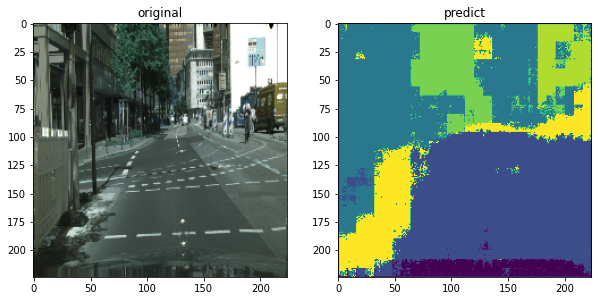

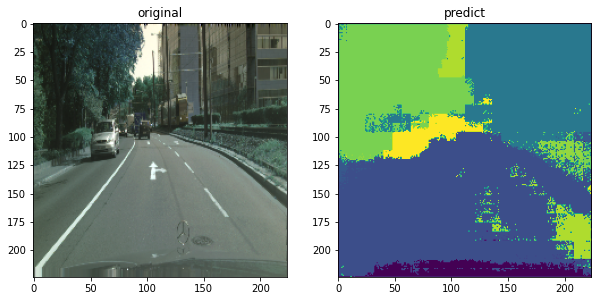

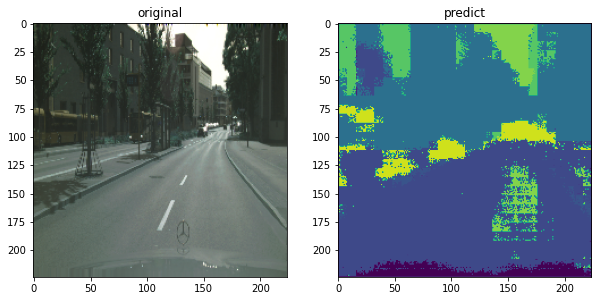

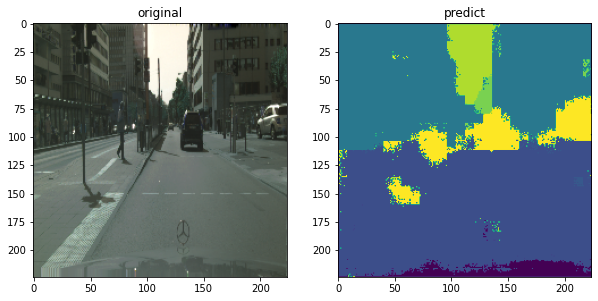

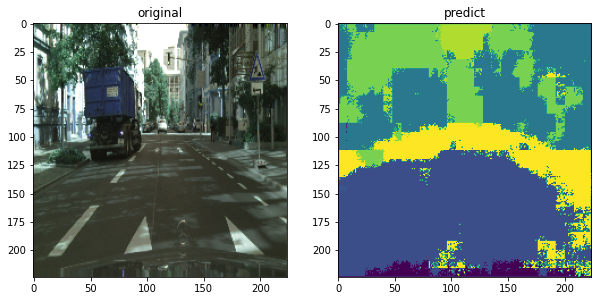

In [10]:
for i in range (6):
    pred_val = val_imgi[i]
    ori_val = vals[i]

    fig = plt.figure(figsize=(10,30))
    ax = fig.add_subplot(1,2,1)
    ax.imshow(ori_val)
    ax.set_title("original")

    ax = fig.add_subplot(1,2,2)
    ax.imshow(pred_val)
    ax.set_title('predict')

    plt.show()

## TRAIN ON WHOLE DATASET

In [11]:
label_dir = '/content/Cityspaces/gtFine/train/'
ori_dir = '/content/Cityspaces/images/train'

In [12]:
l_dir = os.listdir(label_dir)
print (l_dir)
paths = []
for path in l_dir:
    label_path = glob.glob(label_dir + path +'/'+ path +'*'+'gtFine_labelIds.png')
    paths.append(label_path)

['hamburg', 'zurich', 'cologne', 'darmstadt', 'tubingen', 'bochum', 'aachen', 'jena', 'erfurt', 'stuttgart', 'krefeld', 'hanover', 'dusseldorf', 'weimar', 'monchengladbach', 'bremen', 'ulm', 'strasbourg']


In [13]:
label_paths = []
for sublist in paths:
    for img in sublist:
        label_paths.append(img)
label_paths.sort()
print (label_paths)
print (len(label_paths))

['/content/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000001_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000003_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000004_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000005_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000006_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000007_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000008_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000009_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000010_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000011_000019_gtFine_labelI

In [14]:
o_dir = os.listdir(ori_dir)
print (ori_dir)
paths = []
for path in o_dir:
    print (path)
    ori_path = glob.glob(ori_dir + '/' +path + '/' + '*' + 'leftImg8bit.png')
    print (ori_path)
    paths.append(ori_path)

/content/Cityspaces/images/train
hamburg
['/content/Cityspaces/images/train/hamburg/hamburg_000000_047390_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_030279_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_011641_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_080878_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_052904_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_025802_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_043944_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_079657_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_032719_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_020211_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000_027304_leftImg8bit.png', '/content/Cityspaces/images/train/hamburg/hamburg_000000

In [15]:
ori_paths = []
for sublist in paths:
    for img in sublist:
        ori_paths.append(img)
ori_paths.sort()
print (ori_paths)
print (len(ori_paths))

['/content/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000001_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000002_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000003_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000004_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000005_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000006_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000007_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000008_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000009_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000010_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000011_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aache

In [16]:
label_paths = np.array(label_paths)
ori_paths = np.array (ori_paths)
label = label_paths[2]
seg = cv2.imread (label)
seg = cv2.resize (seg,(224,224))
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

minimum seg = 1, maximum seg = 33, Total number of segmentation classes = 33


In [17]:
print (label_paths.shape)
print (ori_paths.shape)

(2975,)
(2975,)


In [18]:
# for vgg basenet, resize all the input img to 224,224 
input_height , input_width = 224 , 224
output_height , output_width = 224 , 224

def getImageArr( path , width , height ):
        img = cv2.imread(path)
        img = np.float32(cv2.resize(img, ( width , height ))) / 255
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros(( height , width  , nClasses ))
    img = cv2.imread(path)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c).astype(int)
    return seg_labels

X = []
Y = []
for im in ori_paths:
    X.append(getImageArr(im, input_width, input_height))
X = np.array(X)
print (X.shape)

(2975, 224, 224, 3)


In [ ]:
for seg in label_paths:
    Y.append(getSegmentationArr(seg, n_classes, input_width, input_height))
Y = np.array(Y)
print (Y.shape)